<div style="display: flex; background-color: RGB(106,90,205);">
<h1 style="margin: auto; padding: 30px; color: RGB(255,255,255);">PROJET 5 - Produisez une étude de marché</h1>
</div>

<div style="background-color: RGB(106,90,205);">
<h2 style="margin: auto; padding: 20px; color:RGB(255,255,255);">Mission : identifier les pays propices à une insertion dans le marché du poulet</h2>
</div>

<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Importation des librairies et des fonctions utiles</h3>
</div>

In [1]:
from functions import*
from sklearn import decomposition
from sklearn import preprocessing 
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.stats import shapiro, ks_2samp

<div style="background-color: RGB(106,90,205);">
<h2 style="margin: auto; padding: 20px; color:RGB(255,255,255);">Construction de notre échantillon avec les différentes variables demandées</h2>
</div>

<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Importation du fichier relatif à la population</h3>
</div>

In [2]:
# On importe le fichier de la population mondiale provenant du site de la 'FAO', relatif aux années 2008 et 2013
# L'individu 'Chine' n'a pas été sélectionné, pour éviter les doublons
pop = pd.read_csv("pop.csv")

# On observe
pop.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2008,2008,1000 personnes,27294.031,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2013,2013,1000 personnes,31731.688,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
2,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2008,2008,1000 personnes,50412.129,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
3,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2013,2013,1000 personnes,53767.396,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
4,OA,Séries temporelles annuelles,3,Albanie,511,Population totale,3010,Population-Estimations,2008,2008,1000 personnes,2991.651,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."


In [3]:
# La variable 'Valeur' est mise à la bonne unité
pop['Valeur'] = pop['Valeur']*1000

> Nous allons construire la variable '%evopop' :
>
> - Calcul de la différence de population entre 2008 et 2013, exprimée en pourcentage, avec en parallèle un traitement 
> des valeurs manquantes, aberrantes et des doublons sur la table 'pop'

In [4]:
# Formatage du dataframe pour une question pratique
pop = pop.pivot_table(values = ["Valeur"], index = ["Code zone", "Zone", "Produit"],
                      columns = ["Année"], aggfunc = sum)
pop.columns = ['2008', '2013']
pop = pop.reset_index()

In [5]:
# Calcul de la nouvelle variable '%evopop'
pop.loc[:, '%evopop'] = ((pop['2013']/pop['2008'])-1)*100

# On observe
pop.head()

,Code zone,Zone,Produit,2008,2013,%evopop
0,1,Arménie,Population-Estimations,2908220.0,2893509.0,-0.505842
1,2,Afghanistan,Population-Estimations,27294031.0,31731688.0,16.258709
2,3,Albanie,Population-Estimations,2991651.0,2918978.0,-2.429194
3,4,Algérie,Population-Estimations,34860715.0,38338562.0,9.976408
4,5,Samoa américaines,Population-Estimations,57030.0,55307.0,-3.021217


<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Recherche des valeurs manquantes</h3>
</div>

In [6]:
# Recherche des valeurs manquantes au sein de la table 'pop'
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 6 columns):
Code zone    232 non-null int64
Zone         232 non-null object
Produit      232 non-null object
2008         230 non-null float64
2013         230 non-null float64
%evopop      228 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 11.0+ KB


> Nous observons des valeurs manquantes au sein de la nouvelle variable

In [7]:
# Recherche des individus ayant comme valeur 'NaN' pour la variable '%evopop'
pop.loc[np.isnan(pop['%evopop']),:]

,Code zone,Zone,Produit,2008,2013,%evopop
134,151,Antilles néerlandaises (ex),Population-Estimations,190320.0,NaN,NaN
183,206,Soudan (ex),Population-Estimations,42218632.0,NaN,NaN
229,276,Soudan,Population-Estimations,NaN,36849918.0,NaN
230,277,Soudan du Sud,Population-Estimations,NaN,11177490.0,NaN


In [8]:
# Suppression des individus de la table 'pop'
pop = pop.loc[~np.isnan(pop['%evopop'])]

# Nous re-effectuons le test sur les valeurs manquantes
pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 0 to 231
Data columns (total 6 columns):
Code zone    228 non-null int64
Zone         228 non-null object
Produit      228 non-null object
2008         228 non-null float64
2013         228 non-null float64
%evopop      228 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 12.5+ KB


> Nous n'avons donc plus de valeur manquante au sein de la table 'pop' 

In [9]:
# Nous ne conservons que les colonnes utiles à notre travail
pop = pop.drop(columns=['Produit', '2008'])

# Renommage des colonnes 
pop.columns = ['Code Pays', 'Pays', 'pop2013','%evopop']

# On observe
pop.head()

,Code Pays,Pays,pop2013,%evopop
0,1,Arménie,2893509.0,-0.505842
1,2,Afghanistan,31731688.0,16.258709
2,3,Albanie,2918978.0,-2.429194
3,4,Algérie,38338562.0,9.976408
4,5,Samoa américaines,55307.0,-3.021217


<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Recherche des valeurs aberrantes</h3>
</div>

In [10]:
# Nous faisons un trie ascendant et descendant sur la variable 'Code Pays' avec la méthode .sort_values()
pop.sort_values(by='Code Pays',ascending=True).head()

,Code Pays,Pays,pop2013,%evopop
0,1,Arménie,2893509.0,-0.505842
1,2,Afghanistan,31731688.0,16.258709
2,3,Albanie,2918978.0,-2.429194
3,4,Algérie,38338562.0,9.976408
4,5,Samoa américaines,55307.0,-3.021217


In [11]:
pop.sort_values(by='Code Pays',ascending=False).head()

,Code Pays,Pays,pop2013,%evopop
231,299,Territoire palestinien occupé,4414644.0,14.597320
228,273,Monténégro,627094.0,0.947996
227,272,Serbie,8920215.0,-1.970833
226,270,Mayotte,227351.0,15.830527
225,264,Île de Man,82013.0,4.429928


> La variable 'Code Pays' ne contient pas de valeur aberrante

In [12]:
# Nous faisons un trie ascendant et descendant sur la variable 'Pays' avec la méthode .sort_values()
pop.sort_values(by='Pays',ascending=True).head()

,Code Pays,Pays,pop2013,%evopop
1,2,Afghanistan,31731688.0,16.258709
180,202,Afrique du Sud,53767396.0,6.655674
2,3,Albanie,2918978.0,-2.429194
3,4,Algérie,38338562.0,9.976408
65,79,Allemagne,81265139.0,0.165405


In [13]:
pop.sort_values(by='Pays',ascending=False).head()

,Code Pays,Pays,pop2013,%evopop
216,243,Îles Wallis et Futuna,12551.0,-10.247426
214,239,Îles Vierges britanniques,29056.0,13.482268
215,240,Îles Vierges américaines,105311.0,-1.392348
201,224,Îles Turques et Caïques,33108.0,12.302839
22,25,Îles Salomon,563513.0,11.702417


> La variable 'Pays' ne contient pas de valeur aberrante

In [14]:
# Nous faisons un trie ascendant et descendant sur la variable '%evopop' avec la méthode .sort_values()
pop.sort_values(by='%evopop',ascending=True).head()

,Code Pays,Pays,pop2013,%evopop
216,243,Îles Wallis et Futuna,12551.0,-10.247426
39,47,Îles Cook,17767.0,-7.521341
62,73,Géorgie,4045910.0,-6.787307
110,126,Lituanie,2997334.0,-6.759509
103,119,Lettonie,2040784.0,-6.036104


In [15]:
pop.sort_values(by='%evopop',ascending=False).head()

,Code Pays,Pays,pop2013,%evopop
158,179,Qatar,2250473.0,61.981211
102,118,Koweït,3598385.0,35.668316
198,221,Oman,3711481.0,34.522007
202,225,Émirats arabes unis,9006263.0,30.633882
96,112,Jordanie,8413464.0,29.640905


> La variable '%evopop' ne contient pas de valeur aberrante

<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Recherche des doublons</h3>
</div>

In [16]:
# Recherche du nombre d'éléments au sein de la table 'pop'
len(pop)

228

In [17]:
# Détection et suppression des doublons 
pop.drop_duplicates(keep='first',inplace=True)
len(pop)

228

> Au regard du nombre d'éléments  après traitement, le table 'pop' ne contient plus, ni valeur manquante, ni valeur aberrante, ni doublon

<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Importation du fichier relatif au PIB</h3>
</div>

In [18]:
# On importe le fichier du PIB provenant du site de la 'FAO'
# l'individu 'Chine' n'a pas été sélectionné, pour éviter les doublons
pib = pd.read_csv("pib.csv")

# On observe
pib.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,2,Afghanistan,6110,Valeur (US $),22008,Produit Intérieur Brut,2013,2013,millions,2.161036e+04,X,Sources internationales sûres,Data from UNSD AMA
1,MK,Indicateurs macro,202,Afrique du Sud,6110,Valeur (US $),22008,Produit Intérieur Brut,2013,2013,millions,3.666257e+05,X,Sources internationales sûres,Data from UNSD AMA
2,MK,Indicateurs macro,3,Albanie,6110,Valeur (US $),22008,Produit Intérieur Brut,2013,2013,millions,1.277628e+04,X,Sources internationales sûres,Data from UNSD AMA
3,MK,Indicateurs macro,4,Algérie,6110,Valeur (US $),22008,Produit Intérieur Brut,2013,2013,millions,2.097835e+05,X,Sources internationales sûres,Data from UNSD AMA
4,MK,Indicateurs macro,79,Allemagne,6110,Valeur (US $),22008,Produit Intérieur Brut,2013,2013,millions,3.752514e+06,X,Sources internationales sûres,Data from UNSD AMA


In [19]:
# La variable 'Valeur' est mise à la bonne unité
pib['Valeur'] = pib['Valeur']*1000000

In [20]:
# Formatage du dataframe
pib = pib.pivot_table(values = ["Valeur"], index = ["Code zone", "Zone"],
                      columns = ["Produit"], aggfunc = sum)
pib.columns = ['Produit Intérieur Brut']
pib = pib.reset_index()

# Renommage des colonnes
pib.columns = ['Code Pays', 'Pays', 'PIB']

# On observe
pib.head()

,Code Pays,Pays,PIB
0,1,Arménie,1.112146e+10
1,2,Afghanistan,2.161036e+10
2,3,Albanie,1.277628e+10
3,4,Algérie,2.097835e+11
4,6,Andorre,3.281763e+09


<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Recherche des valeurs manquantes</h3>
</div>

In [21]:
pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 3 columns):
Code Pays    209 non-null int64
Pays         209 non-null object
PIB          209 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.0+ KB


> Nous n'avons pas de valeur manquante au sein de la table 'pib'

<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Jointure entière sur les tables 'pop' et 'pib'</h3>
</div>

In [22]:
popib = pd.merge(pop, pib, how='outer', on=['Code Pays', 'Pays'])

# On observe
popib.head()

,Code Pays,Pays,pop2013,%evopop,PIB
0,1,Arménie,2893509.0,-0.505842,1.112146e+10
1,2,Afghanistan,31731688.0,16.258709,2.161036e+10
2,3,Albanie,2918978.0,-2.429194,1.277628e+10
3,4,Algérie,38338562.0,9.976408,2.097835e+11
4,5,Samoa américaines,55307.0,-3.021217,NaN


<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Recherche des valeurs manquantes</h3>
</div>

In [23]:
# Recherche des valeurs manquantes au sein de la table 'popib'
popib.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 0 to 230
Data columns (total 5 columns):
Code Pays    231 non-null int64
Pays         231 non-null object
pop2013      228 non-null float64
%evopop      228 non-null float64
PIB          209 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 10.8+ KB


> Nous observons des valeurs manquantes au sein des variables suivantes :
> - 'pop2013'
> - '%evopop'
> - 'PIB'

In [24]:
# Recherche des individus de la variable 'pop2013' avec une valeur 'NaN'
popib.loc[np.isnan(popib['pop2013']),:]

,Code Pays,Pays,pop2013,%evopop,PIB
228,275,Kosovo,NaN,NaN,7.072365e+09
229,279,Curaçao,NaN,NaN,3.147616e+09
230,280,Sint Maarten (Partie Néerlandaise),NaN,NaN,1.022919e+09


In [25]:
# Suppression des individus de la table 'poppib'
popib = popib.loc[~np.isnan(popib['pop2013']),:]

# Nous re-effectuons le test sur les valeurs manquantes
popib.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 0 to 227
Data columns (total 5 columns):
Code Pays    228 non-null int64
Pays         228 non-null object
pop2013      228 non-null float64
%evopop      228 non-null float64
PIB          206 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 10.7+ KB


In [26]:
# Recherche des individus de la variable 'PIB' avec une valeur 'NaN'
popib.loc[np.isnan(popib['PIB']),:]

,Code Pays,Pays,pop2013,%evopop,PIB
4,5,Samoa américaines,55307.0,-3.021217,NaN
54,64,Îles Féroé,48747.0,0.540373,NaN
55,65,Îles Falkland,2870.0,-0.519931,NaN
59,69,Guyane française,254503.0,14.408052,NaN
68,82,Gibraltar,33831.0,3.357571,NaN
73,87,Guadeloupe,451338.0,0.892600,NaN
74,88,Guam,160375.0,0.842582,NaN
79,94,Saint-Siège,801.0,0.881612,NaN
119,135,Martinique,389050.0,-2.028924,NaN
141,160,Nioué,1623.0,-0.976205,NaN


In [27]:
# Suppression des individus de la table 'popib'
popib = popib.loc[~np.isnan(popib['PIB']),:]

# Nous re-effectuons le test sur les valeurs manquantes
popib.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206 entries, 0 to 227
Data columns (total 5 columns):
Code Pays    206 non-null int64
Pays         206 non-null object
pop2013      206 non-null float64
%evopop      206 non-null float64
PIB          206 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 9.7+ KB


> Nous n'avons donc plus de valeur manquante au sein de la table 'popib'

> Nous allons construire la variable suivante 'PIB/hab' : 
>
> - Calcul du PIB par habitant

In [28]:
# Nous allons créer une nouvelle colonne 'PIb/hab'
popib['PIB/hab'] = popib['PIB']/popib['pop2013']

# Nous ne conservons que les colonnes utiles à notre travail
popib = popib.drop(columns=['pop2013', 'PIB'])

# On observe
popib.head()

,Code Pays,Pays,%evopop,PIB/hab
0,1,Arménie,-0.505842,3843.590751
1,2,Afghanistan,16.258709,681.033974
2,3,Albanie,-2.429194,4376.970549
3,4,Algérie,9.976408,5471.866638
5,6,Andorre,-3.664397,40621.912722


<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Recherche des valeurs aberrantes</h3>
</div>

In [29]:
# Nous faisons un trie ascendant et descendant sur la variable 'PIB/hab' avec la méthode .sort_values()
popib.sort_values(by='PIB/hab',ascending=True).head()

,Code Pays,Pays,%evopop,PIB/hab
178,201,Somalie,15.507346,106.512965
26,29,Burundi,16.900601,255.372685
114,130,Malawi,16.157769,314.708244
31,37,République centrafricaine,3.550133,347.913166
139,158,Niger,20.999059,416.139942


In [30]:
popib.sort_values(by='PIB/hab',ascending=False).head()

,Code Pays,Pays,%evopop,PIB/hab
109,125,Liechtenstein,3.638052,173527.486263
123,140,Monaco,5.907455,172598.231387
220,256,Luxembourg,12.289298,113341.237463
142,162,Norvège,6.406745,103110.441896
15,17,Bermudes,-2.868859,90329.786048


> La variable 'PIB/hab' ne contient pas de valeur aberrante 

<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Recherche des doublons</h3>
</div>

In [31]:
# Recherche du nombre d'éléments au sein de la table 'pop'
len(popib)

206

In [32]:
# Détection et suppression des doublons 
popib.drop_duplicates(keep='first',inplace=True)
len(pib)

209

> La table ne contient pas de doublon 

<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Importation du fichier relatif aux protéines</h3>
</div>

In [33]:
# On importe le fichier des protéines provenant du site de la 'FAO'
# D'une part, l'individu 'Chine' n'a pas été sélectionné, pour éviter les doublons
# D'autre part les données relatives au pays supprimées ci-dessus n'ont pas été sélectionnées
prot = pd.read_csv("prot.csv")

# On observe
prot.head()

,Code Domaine,Domaine,Code Pays,Pays,Code Élément,Élément,Code Produit,Produit,Code Année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires,2,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,2901,Total General,2013,2013,g/personne/jour,58.25,Fc,Donnée calculée
1,FBS,Bilans Alimentaires,2,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,2941,Produits Animaux,2013,2013,g/personne/jour,12.22,Fc,Donnée calculée
2,FBS,Bilans Alimentaires,202,Afrique du Sud,674,Disponibilité de protéines en quantité (g/pers...,2901,Total General,2013,2013,g/personne/jour,85.33,Fc,Donnée calculée
3,FBS,Bilans Alimentaires,202,Afrique du Sud,674,Disponibilité de protéines en quantité (g/pers...,2941,Produits Animaux,2013,2013,g/personne/jour,36.38,Fc,Donnée calculée
4,FBS,Bilans Alimentaires,3,Albanie,674,Disponibilité de protéines en quantité (g/pers...,2901,Total General,2013,2013,g/personne/jour,111.42,Fc,Donnée calculée


> Nous allons construire la variable '%protani' :
>
> - Calcul de la proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays, avec en parallèle un traitement des valeurs manquantes, aberrantes et des doublons sur la table 'prot'

In [34]:
# Formatage du dataframe 
prot = prot.pivot_table(values = ["Valeur"], index = ["Code Pays", "Pays", "Élément"],columns = ["Produit"],
                          aggfunc = sum)
prot.columns = ['Produits Animaux', 'Total General']
prot = prot.reset_index()

In [35]:
# Construction de la nouvelle variable 
prot['%protani'] = (prot['Produits Animaux']/prot['Total General'])*100

# Suppression des colonnes inutiles
prot = prot.drop(columns=['Élément', 'Produits Animaux', 'Total General'])

# On observe
prot.head()

,Code Pays,Pays,%protani
0,1,Arménie,48.034207
1,2,Afghanistan,20.978541
2,3,Albanie,53.329743
3,4,Algérie,27.174859
4,7,Angola,32.134125


<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Recherche des valeurs manquantes</h3>
</div>

In [36]:
prot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 3 columns):
Code Pays    173 non-null int64
Pays         173 non-null object
%protani     173 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.1+ KB


> Nous n'avons pas de valeur manquante au sein de la table 'prot'

<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Recherche des valeurs aberrantes</h3>
</div>

In [37]:
# Nous faisons un trie ascendant et descendant sur la variable '%protani' avec la méthode .sort_values()
prot.sort_values(by='%protani',ascending=True).head()

,Code Pays,Pays,%protani
128,184,Rwanda,9.839817
93,130,Malawi,12.068164
165,238,Éthiopie,12.731788
103,144,Mozambique,13.894967
160,233,Burkina Faso,13.945578


In [38]:
prot.sort_values(by='%protani',ascending=False).head()

,Code Pays,Pays,%protani
63,96,Chine - RAS de Hong-Kong,73.084069
66,99,Islande,72.248016
95,132,Maldives,70.211549
5,8,Antigua-et-Barbuda,67.889141
107,150,Pays-Bas,67.821339


> La variable '%protani' ne contient plus de valeur aberrante

<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Recherche des doublons</h3>
</div>

In [39]:
# Recherche du nombre d'éléments au sein de la table 'prot'
len(prot)

173

In [40]:
# Détection et suppression des doublons au sein de la variable 'Pays'
prot.drop_duplicates(keep='first',inplace=True)

In [41]:
len(prot)

173

> Au regard du nombre d'éléments  après traitement, la table 'prot' ne contient plus, ni valeur manquante, ni valeur aberrante, ni doublon

<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Importation du fichier relatif à la disponibilité alimentaire</h3>
</div>

In [42]:
# On importe le fichier de la disponibilité alimantaire provenant du site de la 'FAO'
# D'une part, l'individu 'Chine' n'a pas été sélectionné, pour éviter les doublons
# D'autre part les données relatives au pays supprimées ci-dessus n'ont pas été sélectionnées
bilanalim = pd.read_csv("bilanalim.csv")

# On observe
bilanalim.head()

,Code Domaine,Domaine,Code Pays,Pays,Code Élément,Élément,Code Produit,Produit,Code Année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires,2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2901,Total General,2013,2013,Kcal/personne/jour,2090.00,Fc,Donnée calculée
1,FBS,Bilans Alimentaires,2,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,2901,Total General,2013,2013,g/personne/jour,58.25,Fc,Donnée calculée
2,FBS,Bilans Alimentaires,202,Afrique du Sud,664,Disponibilité alimentaire (Kcal/personne/jour),2901,Total General,2013,2013,Kcal/personne/jour,3022.00,Fc,Donnée calculée
3,FBS,Bilans Alimentaires,202,Afrique du Sud,674,Disponibilité de protéines en quantité (g/pers...,2901,Total General,2013,2013,g/personne/jour,85.33,Fc,Donnée calculée
4,FBS,Bilans Alimentaires,3,Albanie,664,Disponibilité alimentaire (Kcal/personne/jour),2901,Total General,2013,2013,Kcal/personne/jour,3193.00,Fc,Donnée calculée


> Nous allons construire les variables 'Dispoalim(Kcal/hab/an)' et 'Dispoprot(kg/hab/an)' :
>
> - Calcul de la disponibilité alimentaire en protéines et en calories par habitant, avec en parallèle un traitement des valeurs manquantes, aberrantes et des doublons sur la table 'bilanalim'

In [43]:
# Formatage du dataframe 
bilanalim = bilanalim.pivot_table(values = ["Valeur"], index = ["Code Pays", "Pays"],
                      columns = ["Élément"], aggfunc = sum)
bilanalim.columns = ['Disponibilité alimentaire (Kcal/personne/jour)', 
               'Disponibilité de protéines en quantité (g/personne/jour)']
bilanalim = bilanalim.reset_index()

In [44]:
# Valeurs mises aux bonnes unités
bilanalim['Disponibilité alimentaire (Kcal/personne/jour)']=bilanalim['Disponibilité alimentaire (Kcal/personne/jour)']*365
bilanalim['Disponibilité de protéines en quantité (g/personne/jour)']=(bilanalim['Disponibilité de protéines en quantité (g/personne/jour)']/1000)*365

In [45]:
# Renommage des colonnes
bilanalim.columns = ['Code Pays', 'Pays', 'Dispoalim(Kcal/hab/an)', 'Dispoprot(kg/hab/an)']

# On observe
bilanalim.head()

,Code Pays,Pays,Dispoalim(Kcal/hab/an),Dispoprot(kg/hab/an)
0,1,Arménie,1068720.0,32.86460
1,2,Afghanistan,762850.0,21.26125
2,3,Albanie,1165445.0,40.66830
3,4,Algérie,1203040.0,33.56540
4,7,Angola,902645.0,20.89990


<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Recherche des valeurs manquantes</h3>
</div>

In [46]:
bilanalim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 4 columns):
Code Pays                 173 non-null int64
Pays                      173 non-null object
Dispoalim(Kcal/hab/an)    173 non-null float64
Dispoprot(kg/hab/an)      173 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.5+ KB


> La table ne contient pas de valeur manquante

<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Recherche des valeurs aberrantes</h3>
</div>

In [47]:
# Nous faisons un trie ascendant et descendant sur la variable 'Dispoalim(Kcal/hab/an)' avec la méthode .sort_values()
bilanalim.sort_values(by='Dispoalim(Kcal/hab/an)',ascending=True).head()

,Code Pays,Pays,Dispoalim(Kcal/hab/an),Dispoprot(kg/hab/an)
24,37,République centrafricaine,685835.0,16.81190
168,251,Zambie,704450.0,20.15530
92,129,Madagascar,748980.0,17.03455
1,2,Afghanistan,762850.0,21.26125
61,93,Haïti,763215.0,17.41780


In [48]:
bilanalim.sort_values(by='Dispoalim(Kcal/hab/an)',ascending=False).head()

,Code Pays,Pays,Dispoalim(Kcal/hab/an),Dispoprot(kg/hab/an)
8,11,Autriche,1375320.0,38.76665
169,255,Belgique,1362545.0,36.35035
154,223,Turquie,1352690.0,39.46380
159,231,États-Unis d'Amérique,1343930.0,40.00400
72,105,Israël,1317650.0,46.77110


> La variable 'Dispoalim(Kcal/hab/an)' ne contient pas de valeur aberrante

In [49]:
# Nous faisons un trie ascendant et descendant sur la variable 'Dispoprot(kg/hab/an)' avec la méthode .sort_values()
bilanalim.sort_values(by='Dispoprot(kg/hab/an)',ascending=True).head()

,Code Pays,Pays,Dispoalim(Kcal/hab/an),Dispoprot(kg/hab/an)
89,123,Libéria,804460.0,13.74590
124,175,Guinée-Bissau,836580.0,16.07460
103,144,Mozambique,833295.0,16.68050
24,37,République centrafricaine,685835.0,16.81190
92,129,Madagascar,748980.0,17.03455


In [50]:
bilanalim.sort_values(by='Dispoprot(kg/hab/an)',ascending=False).head()

,Code Pays,Pays,Dispoalim(Kcal/hab/an),Dispoprot(kg/hab/an)
66,99,Islande,1233700.0,48.74210
63,96,Chine - RAS de Hong-Kong,1200850.0,47.15070
72,105,Israël,1317650.0,46.77110
90,126,Lituanie,1247205.0,45.43885
95,132,Maldives,997180.0,44.68695


> La variable 'Dispoprot(kg/hab/an)' ne contient pas de valeur aberrante

<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Recherche des doublons</h3>
</div>

In [51]:
# recherche du nombre d'élémnets au sein de la table 'bilanalim'
len(bilanalim)

173

In [52]:
# détection et suppression des doublons 
bilanalim.drop_duplicates(keep='first',inplace=True)

In [53]:
len(bilanalim)

173

> Au regard du nombre d'éléments  après traitement, la table 'bilanalim' ne contient plus, ni valeur manquante, ni 
> valeur aberrante, ni doublon

<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Importation du fichier relatif aux importations de volailles</h3>
</div>

In [54]:
# On importe le fichier provenant du site de la 'FAO'
# D'une part, l'individu 'Chine' n'a pas été sélectionné, pour éviter les doublons
# D'autre part les données relatives au pays supprimées ci-dessus n'ont pas été sélectionnées
impvola = pd.read_csv("impvola.csv")

# On observe
impvola.head()

,Code Domaine,Domaine,Code Pays,Pays,Code Élément,Élément,Code Produit,Produit,Code Année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires,2,Afghanistan,5611,Importations - Quantité,2734,Viande de Volailles,2013,2013,Milliers de tonnes,48,S,Données standardisées
1,FBS,Bilans Alimentaires,202,Afrique du Sud,5611,Importations - Quantité,2734,Viande de Volailles,2013,2013,Milliers de tonnes,356,S,Données standardisées
2,FBS,Bilans Alimentaires,3,Albanie,5611,Importations - Quantité,2734,Viande de Volailles,2013,2013,Milliers de tonnes,25,S,Données standardisées
3,FBS,Bilans Alimentaires,4,Algérie,5611,Importations - Quantité,2734,Viande de Volailles,2013,2013,Milliers de tonnes,3,S,Données standardisées
4,FBS,Bilans Alimentaires,79,Allemagne,5611,Importations - Quantité,2734,Viande de Volailles,2013,2013,Milliers de tonnes,788,S,Données standardisées


In [55]:
# 'Valeur' mise à la bonne unité
impvola['Valeur'] = impvola['Valeur']*1000000

> Nous allons construire la variable 'impvola' :
>
> - Calcul de la quantité importée de volailles par pays, avec en parallèle un traitement des valeurs manquantes, aberrantes et des doublons sur la table 'impvola'

In [56]:
# Formatage du dataframe
impvola = impvola.pivot_table(values = ["Valeur"], index = ["Code Pays", "Pays"],columns = ["Élément"],
                          aggfunc = sum)
impvola.columns = ['Importations - Quantité']
impvola = impvola.reset_index()

# Renommage des colonnes 
impvola.columns = ['Code Pays', 'Pays', 'impvola']

# On observe
impvola.head()

,Code Pays,Pays,impvola
0,1,Arménie,32000000
1,2,Afghanistan,48000000
2,3,Albanie,25000000
3,4,Algérie,3000000
4,7,Angola,342000000


<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Recherche des valeurs manquantes</h3>
</div>

In [57]:
impvola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 3 columns):
Code Pays    172 non-null int64
Pays         172 non-null object
impvola      172 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.1+ KB


> La table 'impvola' ne contient pas de valeur manquante

<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Recherche des valeurs aberrantes</h3>
</div>

In [58]:
# Nous faisons un trie ascendant et descendant sur la variable 'impvola' avec la méthode .sort_values()
impvola.sort_values(by='impvola',ascending=True).head()

,Code Pays,Pays,impvola
85,120,République démocratique populaire lao,0
72,105,Israël,0
80,114,Kenya,0
91,129,Madagascar,0
92,130,Malawi,0


In [59]:
impvola.sort_values(by='impvola',ascending=False).head()

,Code Pays,Pays,impvola
63,96,Chine - RAS de Hong-Kong,1186000000
77,110,Japon,1056000000
133,194,Arabie saoudite,879000000
99,138,Mexique,849000000
156,229,Royaume-Uni,812000000


> La variable 'impvola' ne contient pas de valeur aberrante

<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Recherche des doublons</h3>
</div>

In [60]:
# recherche du nombre d'éléments au sein de la table 'impvola'
len(impvola)

172

In [61]:
# détection et suppression des doublons 
impvola.drop_duplicates(keep='first',inplace=True)

In [62]:
len(impvola)

172

> Au regard du nombre d'éléments  après traitement, la table 'impvola' ne contient plus, ni valeur manquante, ni 
> valeur aberrante, ni doublon

<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Jointure entière sur l'ensemble des tables travaillées </h3>
</div>

In [63]:
# Jointure
bdd = pd.merge(popib, prot, how='outer', on=['Code Pays','Pays'])
bdd = pd.merge(bdd, bilanalim, how='outer', on=['Code Pays','Pays'])
bdd = pd.merge(bdd, impvola, how='outer', on=['Code Pays','Pays'])

# Suppression de la variable inutile 
bdd = bdd.drop(columns=['Code Pays'])

# On observe
bdd.head()

,Pays,%evopop,PIB/hab,%protani,Dispoalim(Kcal/hab/an),Dispoprot(kg/hab/an),impvola
0,Arménie,-0.505842,3843.590751,48.034207,1068720.0,32.86460,32000000.0
1,Afghanistan,16.258709,681.033974,20.978541,762850.0,21.26125,48000000.0
2,Albanie,-2.429194,4376.970549,53.329743,1165445.0,40.66830,25000000.0
3,Algérie,9.976408,5471.866638,27.174859,1203040.0,33.56540,3000000.0
4,Andorre,-3.664397,40621.912722,NaN,NaN,NaN,NaN


<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Recherche des valeurs manquantes</h3>
</div>

In [64]:
bdd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 0 to 206
Data columns (total 7 columns):
Pays                      207 non-null object
%evopop                   206 non-null float64
PIB/hab                   206 non-null float64
%protani                  173 non-null float64
Dispoalim(Kcal/hab/an)    173 non-null float64
Dispoprot(kg/hab/an)      173 non-null float64
impvola                   172 non-null float64
dtypes: float64(6), object(1)
memory usage: 12.9+ KB


> Nous observons des valeurs manquantes au sein des variables suivantes :
> - '%evopop'
> - 'PIB/hab'
> - '%protani'
> - 'Dispoalim(Kcal/hab/an)'
> - 'Dispoprot(kg/hab/an)'
> - 'impvola'

In [65]:
# Recherche de l'individu de la variable '%evopop' avec une valeur 'NaN'
bdd.loc[np.isnan(bdd['%evopop']),:]

,Pays,%evopop,PIB/hab,%protani,Dispoalim(Kcal/hab/an),Dispoprot(kg/hab/an),impvola
206,"Chine, Taiwan Province de",NaN,NaN,48.462224,1093905.0,32.7551,116000000.0


In [66]:
# Suppression de l'individu 
bdd = bdd.loc[~np.isnan(bdd['%evopop']),:]

In [67]:
# Recherche des individus de la variable '%protani' avec une valeur 'NaN'
bdd.loc[np.isnan(bdd['%protani']),:]

,Pays,%evopop,PIB/hab,%protani,Dispoalim(Kcal/hab/an),Dispoprot(kg/hab/an),impvola
4,Andorre,-3.664397,40621.912722,NaN,NaN,NaN,NaN
11,Bahreïn,18.017477,24737.179100,NaN,NaN,NaN,NaN
15,Bhoutan,9.132035,2350.879846,NaN,NaN,NaN,NaN
19,Aruba,1.809517,25018.308954,NaN,NaN,NaN,NaN
25,Burundi,16.900601,255.372685,NaN,NaN,NaN,NaN
29,Îles Caïmanes,10.287949,59592.603519,NaN,NaN,NaN,NaN
36,Comores,12.822167,1699.126967,NaN,NaN,NaN,NaN
38,Îles Cook,-7.521341,16971.901278,NaN,NaN,NaN,NaN
51,Guinée équatoriale,24.795433,20246.991548,NaN,NaN,NaN,NaN
66,Groenland,-0.751218,44020.834811,NaN,NaN,NaN,NaN


In [68]:
# Suppression des individus 
bdd = bdd.loc[~np.isnan(bdd['%protani']),:]

In [69]:
# recherche de l'individu de la variable 'impvola' avec une valeur 'NaN'
bdd.loc[np.isnan(bdd['impvola']),:]

,Pays,%evopop,PIB/hab,%protani,Dispoalim(Kcal/hab/an),Dispoprot(kg/hab/an),impvola
92,République populaire démocratique de Corée,2.674445,662.973266,18.309091,764310.0,20.075,NaN


In [70]:
# Suppression de l'individu 
bdd = bdd.loc[~np.isnan(bdd['impvola']),:]

# nous re-effectuons le test sur les valeurs manquantes
bdd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 0 to 204
Data columns (total 7 columns):
Pays                      171 non-null object
%evopop                   171 non-null float64
PIB/hab                   171 non-null float64
%protani                  171 non-null float64
Dispoalim(Kcal/hab/an)    171 non-null float64
Dispoprot(kg/hab/an)      171 non-null float64
impvola                   171 non-null float64
dtypes: float64(6), object(1)
memory usage: 10.7+ KB


> La table ne contient plus de valeur manquante

<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Recherche des doublons</h3>
</div>

In [71]:
# Détection et suppression des doublons 
bdd.drop_duplicates(keep='first',inplace=True)

In [72]:
# Recherche du nombre d'éléments au sein de la table 
len(bdd)

171

> Au regard du nombre d'éléments  après traitement, la table 'bdd' ne contient plus, ni valeur manquante, ni valeur aberrante, ni doublon

<div style="background-color: RGB(106,90,205);">
<h2 style="margin: auto; padding: 20px; color:RGB(255,255,255);">Construction d'un dendrogramme (coupé en 5 groupes) avec l'ensemble des pays étudiés</h2>
</div>

<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Préparation des données pour l'ACP</h3>
</div>

In [73]:
# Nous convertissons la variable 'pays' en index
bdd = bdd.set_index('Pays')

In [74]:
# Nous convertissons ces données en un objet type array Numpy
X = bdd.values

# On observe
X

array([[-5.05842061e-01,  3.84359075e+03,  4.80342070e+01,
         1.06872000e+06,  3.28646000e+01,  3.20000000e+07],
       [ 1.62587087e+01,  6.81033974e+02,  2.09785408e+01,
         7.62850000e+05,  2.12612500e+01,  4.80000000e+07],
       [-2.42919378e+00,  4.37697055e+03,  5.33297433e+01,
         1.16544500e+06,  4.06683000e+01,  2.50000000e+07],
       ...,
       [ 1.22892982e+01,  1.13341237e+05,  6.33298209e+01,
         1.29173500e+06,  4.15662000e+01,  1.00000000e+07],
       [-1.97083329e+00,  5.10297540e+03,  4.85648261e+01,
         9.95720000e+05,  3.00103000e+01,  1.20000000e+07],
       [ 9.47996233e-01,  7.11934910e+03,  5.63130186e+01,
         1.27421500e+06,  4.09055500e+01,  7.00000000e+06]])

In [75]:
names = bdd.index
features = bdd.columns

In [76]:
# Centrage et Réduction
X_scaled = preprocessing.StandardScaler().fit_transform(X)

# Nous déterminons le nombre des composantes principales
n_comp = 4

# Calcul des composantes principales 
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

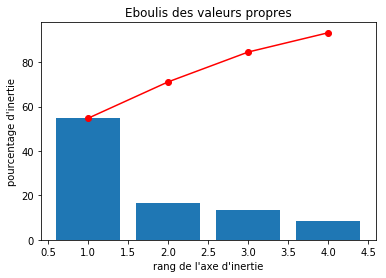

In [77]:
# Eboulis des valeurs propres
display_scree_plot(pca)

<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Représentation des variables par le cercle des corrélations</h3>
</div>

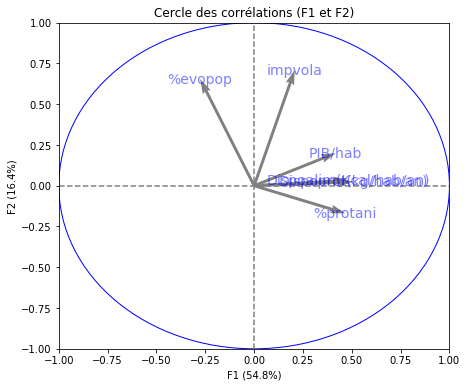

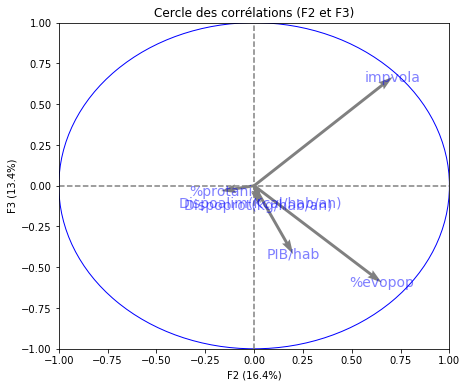

In [78]:
# Cercle des corrélations
pcs = pca.components_

# On observe
display_circles(pcs, n_comp, pca, [(0,1),(1,2)], labels = np.array(features))

<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Représentation des individus par les plans factoriels</h3>
</div>

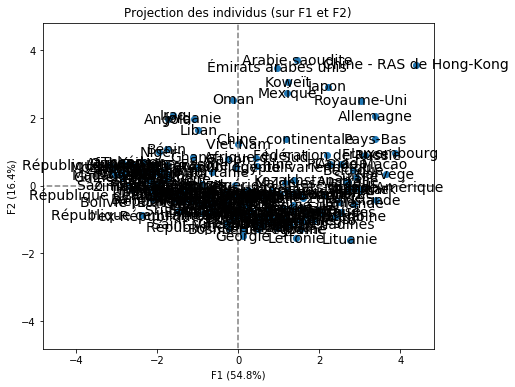

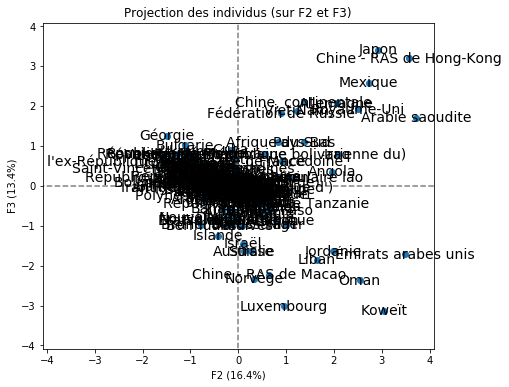

In [79]:
# Projection des individus
X_projected = pca.transform(X_scaled)

# On observe
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(1,2)], labels = np.array(names))

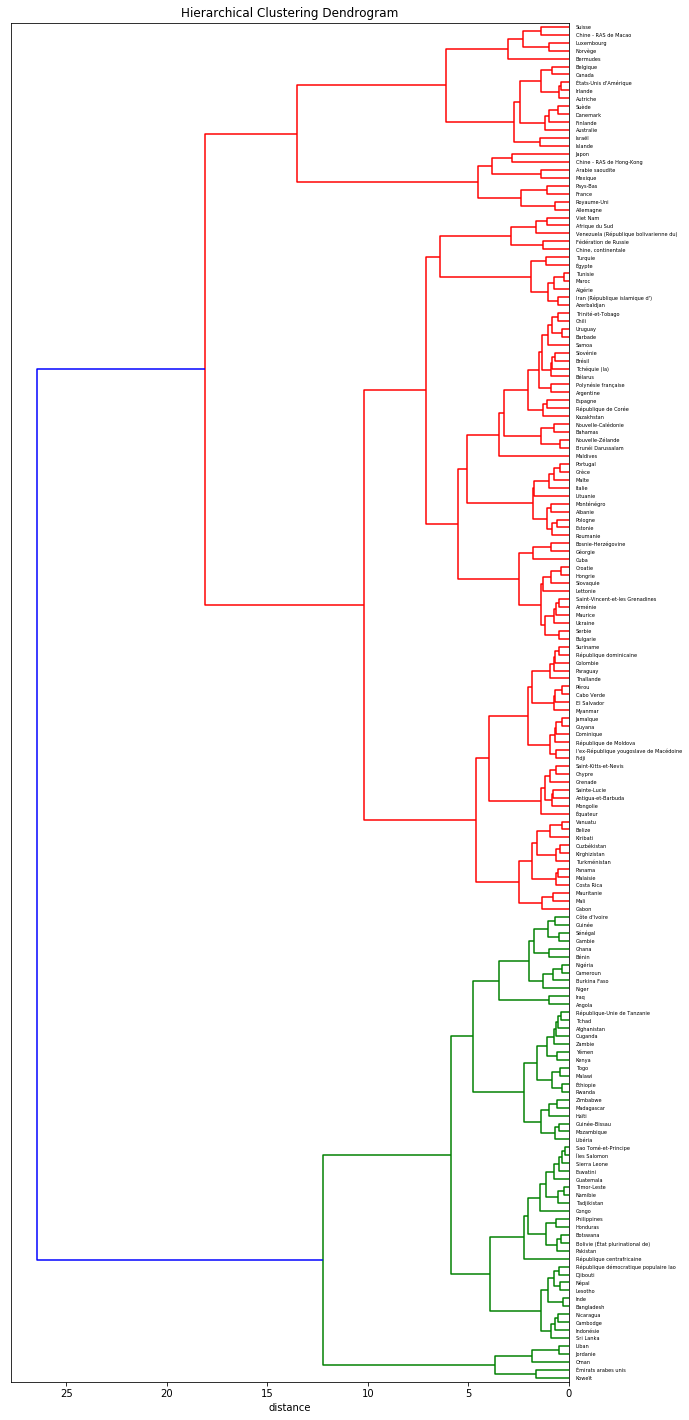

In [80]:
# Clustering hiérarchique
Z = linkage(X_scaled, 'ward')

# Affichage du dendrogramme
plt.figure(figsize=(10,25))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('distance')
dendrogram(Z, labels = names, orientation = "left")

# Export de l'image du plot
plt.savefig('Dendrogram')

<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Dendrogramme découpé en 5 clusters</h3>
</div>

In [81]:
n_comp = 5
clusters = fcluster(Z, n_comp, criterion='maxclust')

# Ajout des clusters à 'BDD'
bdd["clusters"] = clusters

# On observe
bdd.head()

,%evopop,PIB/hab,%protani,Dispoalim(Kcal/hab/an),Dispoprot(kg/hab/an),impvola,clusters
Pays,,,,,,,
Arménie,-0.505842,3843.590751,48.034207,1068720.0,32.86460,32000000.0,3
Afghanistan,16.258709,681.033974,20.978541,762850.0,21.26125,48000000.0,2
Albanie,-2.429194,4376.970549,53.329743,1165445.0,40.66830,25000000.0,3
Algérie,9.976408,5471.866638,27.174859,1203040.0,33.56540,3000000.0,3
Angola,19.480850,5258.408672,32.134125,902645.0,20.89990,342000000.0,2


> Nous exportons le dataframe sous format csv 

In [82]:
bdd.to_csv("pays_clusters.csv")

<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Nous allons visualiser les partitions obtenues dans les 2 premiers plans 
factoriels par ACP</h3>
</div>

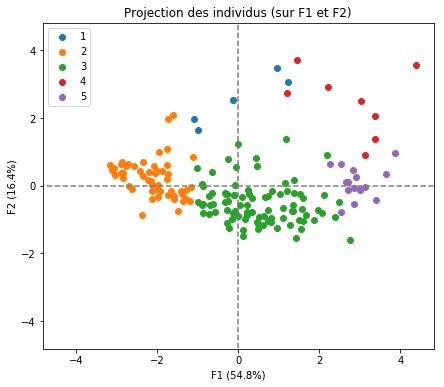

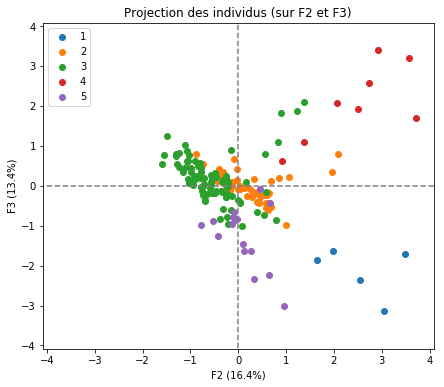

In [83]:
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(1,2)], illustrative_var=clusters)

<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Pour un ciblage plus précis, nous allons découper en 8 groupes</h3>
</div>

In [84]:
n_comp = 8
clusters = fcluster(Z, n_comp, criterion='maxclust')

# Ajout des clusters modifiés à 'BDD'
bdd["clusters"] = clusters

<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Calcul de la position des centroïdes de chacun des groupes</h3>
</div>

In [85]:
centroides = bdd.groupby(by='clusters').mean()
centroides

,%evopop,PIB/hab,%protani,Dispoalim(Kcal/hab/an),Dispoprot(kg/hab/an),impvola
clusters,,,,,,
1,31.760946,25139.924007,42.413275,1.174570e+06,33.609930,1.466000e+08
2,12.215107,1797.203611,24.664284,8.733977e+05,21.856876,3.290741e+07
3,6.796637,6358.566827,47.499524,9.945069e+05,27.647462,1.667647e+07
4,1.165423,16337.833301,54.215652,1.143276e+06,34.696379,4.483333e+07
5,7.725262,6175.614120,28.571489,1.224731e+06,35.471221,2.228571e+07
6,4.625318,8687.987436,45.519063,1.085291e+06,32.179130,4.498000e+08
7,4.317679,37256.022753,58.231765,1.185155e+06,37.558956,8.206250e+08
8,5.437813,66009.147773,62.392466,1.242323e+06,39.605694,6.631250e+07


> Nous exportons le dataframe sous format csv

In [86]:
centroides.to_csv("centroides.csv")

<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Nous relançonc l'ACP</h3>
</div>

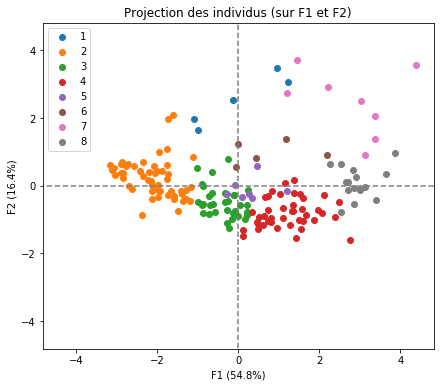

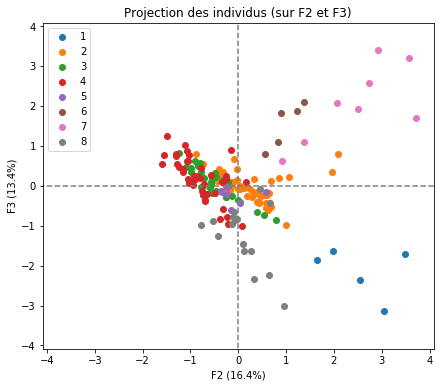

In [87]:
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(1,2)], illustrative_var=clusters)

<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Analyse des résultats obtenus</h3>
</div>

In [88]:
# suite à l'analyse des cercles de corrélations :
# le cluster 1 nous semble très approprié
liste_1 = bdd.loc[bdd["clusters"].isin([1]),:]

# On observe
liste_1.head()

,%evopop,PIB/hab,%protani,Dispoalim(Kcal/hab/an),Dispoprot(kg/hab/an),impvola,clusters
Pays,,,,,,,
Jordanie,29.640905,3992.867103,34.150019,1131500.0,29.05035,84000000.0,1
Koweït,35.668316,48401.609794,49.501109,1277865.0,39.50760,139000000.0,1
Liban,28.339618,8721.248317,36.783340,1119090.0,29.09415,17000000.0,1
Oman,34.522007,21268.756403,51.773371,1147195.0,32.21125,118000000.0,1
Émirats arabes unis,30.633882,43315.138419,39.858536,1197200.0,38.18630,375000000.0,1


<div style="background-color: RGB(106,90,205);">
<h2 style="margin: auto; padding: 20px; color:RGB(255,255,255);">Réalisation de tests statistiques</h2>
</div>

<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Test d'adéquation sur l'ensemble des variables, de façon à trouver une variable dont la loi est normale</h3>
</div>

> Nous allons utiliser le test de Shapiro–Wilk sur l'ensemble des variables, celui-ci teste l'hypothèse nulle selon 
> laquelle un échantillon x1,...,xn est issu d'une population normalement distribuée

In [89]:
shapiro(bdd['%evopop'])

(0.9437400698661804, 2.735466978265322e-06)

In [90]:
shapiro(bdd['PIB/hab'])

(0.6918768882751465, 1.767976798345929e-17)

In [91]:
shapiro(bdd['%protani'])

(0.9579640030860901, 5.209694427321665e-05)

In [92]:
shapiro(bdd['Dispoalim(Kcal/hab/an)'])

(0.9829756617546082, 0.0345720537006855)

In [93]:
shapiro(bdd['Dispoprot(kg/hab/an)'])

(0.9817173480987549, 0.02383829839527607)

In [94]:
shapiro(bdd['impvola'])

(0.4882097840309143, 4.598939927887374e-22)

<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Interprétation des résultats</h3>
</div>

> Aucune des variables de notre DataFrame ne suit une distribution normale

<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Test de comparaison de deux populations (dans le cas non-gaussien)</h3>
</div>

> Sélection de 2 clusters

In [95]:
clust_2 = bdd.loc[bdd['clusters']==2,'Dispoalim(Kcal/hab/an)']
clust_3 = bdd.loc[bdd['clusters']==3,'Dispoalim(Kcal/hab/an)']

> Test de comparaison de médianes : 
> - H0 = médiane cluster 2 égale médiane cluster 3

In [96]:
ks_2samp(clust_2, clust_3)

Ks_2sampResult(statistic=0.630718954248366, pvalue=4.2661702597496815e-08)

<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Interprétation des résultats</h3>
</div>

> - p-value inférieure à 1%, on rejette l'hypothèse H0, donc les médianes ne sont pas égales 
> - Les clusters 2 et 3 n'ont pas les mêmes valeurs 